In [1]:
import ipywidgets as widgets
from matplotlib import pyplot as plt
import nibabel as nib
import numpy as np
import scipy.ndimage as ndi

import mri


@widgets.interact(axial_slice=(0,123), coronal_slice=(0,255), sagittal_slice=(0,255))
def interactiveNifti(axial_slice=50, coronal_slice=50, sagittal_slice=50):

    imgWithHeader = nib.load('./nifti/anon_AD01.nii')
    img=np.asarray(imgWithHeader.dataobj)

    sampling=imgWithHeader.header.get_zooms()

    #the aspect ratio calculated takes into account the rotation required by the orientation metadata saved in the provided DICOM files
    AspectRatio=[sampling[2]/sampling[1],sampling[0]/sampling[2],sampling[1]/sampling[0]]

    fig, ax = plt.subplots(1, 3, figsize=(10, 10))
    ax[0].imshow(ndi.rotate(img[:,axial_slice,:],90), aspect= AspectRatio[1])
    ax[0].axis('off')
    ax[0].set_title('Axial')
    ax[1].imshow(ndi.rotate(img[:,:,coronal_slice],90), aspect= AspectRatio[2])
    ax[1].axis('off')
    ax[1].set_title('Coronal')
    ax[2].imshow(ndi.rotate(img[sagittal_slice,:,:],90), aspect= AspectRatio[0])
    ax[2].axis('off')
    ax[2].set_title('Sagittal')

interactive(children=(IntSlider(value=50, description='axial_slice', max=123), IntSlider(value=50, description…

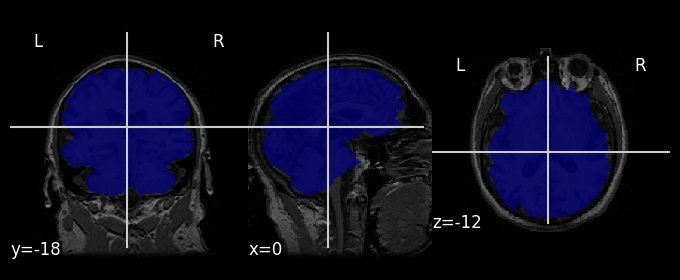

In [2]:
from nilearn.image.image import mean_img
from nilearn.masking import compute_epi_mask
from nilearn.plotting import plot_roi

obj=mri.Process()
obj.getNifti('anon_AD01.nii')
obj.Filter(minmax=(-1,1))
processedNifti = nib.Nifti1Image(obj.niftiImg, obj.niftiImgWithHeader.affine)
mean = mean_img(processedNifti)
mask_img = compute_epi_mask(processedNifti, lower_cutoff=0.4, upper_cutoff=0.66, connected=True, opening=10)
plot_roi(mask_img,mean)